In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [29]:
df = pd.read_csv(r"Data\aa_dataset-tickets-multi-lang-5-2-50-version.csv") 

In [30]:
df.head(2)   

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN


In [31]:
df.tail(2)       

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,400,Feature,IT,Tech Support,NaN,NaN,NaN,NaN,NaN
28586,Inquiry About Project Management Features,Looking for detailed information on the projec...,"Dear [Name], thank you for your email regardin...",Request,Technical Support,low,en,400,Feature,Documentation,Feedback,IT,NaN,NaN,NaN,NaN


In [32]:
df.dtypes

subject     object
body        object
answer      object
type        object
queue       object
priority    object
language    object
version      int64
tag_1       object
tag_2       object
tag_3       object
tag_4       object
tag_5       object
tag_6       object
tag_7       object
tag_8       object
dtype: object

In [33]:
df.shape

(28587, 16)

In [34]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 16)


In [35]:
df.count()

subject     24749
body        28587
answer      28580
type        28587
queue       28587
priority    28587
language    28587
version     28587
tag_1       28587
tag_2       28574
tag_3       28451
tag_4       25529
tag_5       14545
tag_6        5874
tag_7        2040
tag_8         565
dtype: int64

In [36]:
print(df.isnull().sum())

subject      3838
body            0
answer          7
type            0
queue           0
priority        0
language        0
version         0
tag_1           0
tag_2          13
tag_3         136
tag_4        3058
tag_5       14042
tag_6       22713
tag_7       26547
tag_8       28022
dtype: int64


In [37]:
print("Dataset Overview:\n")
display(df.info())




Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   24749 non-null  object
 1   body      28587 non-null  object
 2   answer    28580 non-null  object
 3   type      28587 non-null  object
 4   queue     28587 non-null  object
 5   priority  28587 non-null  object
 6   language  28587 non-null  object
 7   version   28587 non-null  int64 
 8   tag_1     28587 non-null  object
 9   tag_2     28574 non-null  object
 10  tag_3     28451 non-null  object
 11  tag_4     25529 non-null  object
 12  tag_5     14545 non-null  object
 13  tag_6     5874 non-null   object
 14  tag_7     2040 non-null   object
 15  tag_8     565 non-null    object
dtypes: int64(1), object(15)
memory usage: 3.5+ MB


None

In [38]:
df.columns.tolist()

['subject',
 'body',
 'answer',
 'type',
 'queue',
 'priority',
 'language',
 'version',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7',
 'tag_8']

In [39]:
df.nunique()

subject     24749
body        28587
answer      28580
type            4
queue          10
priority        3
language        2
version         3
tag_1         116
tag_2         256
tag_3         392
tag_4         554
tag_5         602
tag_6         575
tag_7         427
tag_8         224
dtype: int64

In [40]:
print("Summary Statistics:\n")
display(df.describe())

Summary Statistics:



,version
count,28587.000000
mean,278.382027
std,165.962935
min,51.000000
25%,52.000000
50%,400.000000
75%,400.000000
max,400.000000


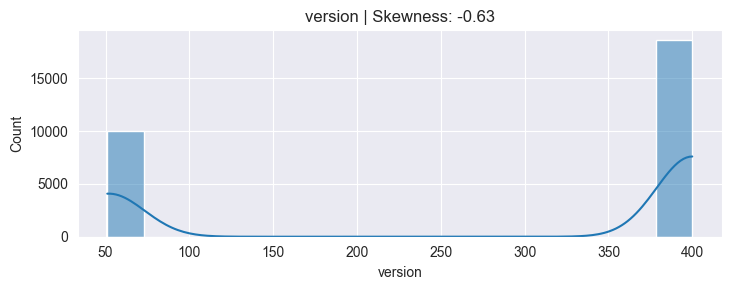

In [41]:

sns.set_style("darkgrid")

# Select numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot histograms for numerical columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()


<Axes: xlabel='priority', ylabel='version'>

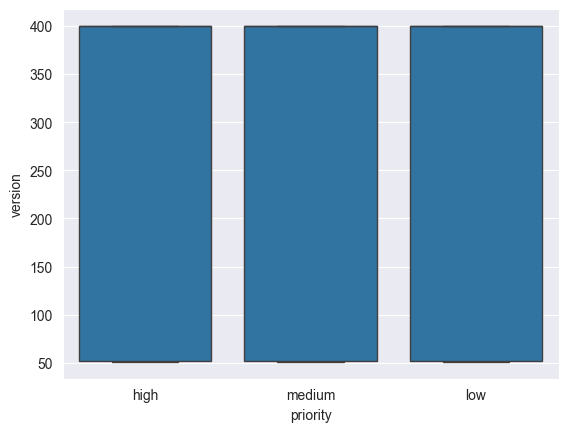

In [42]:
sns.boxplot(x='priority', y='version', data=df)

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

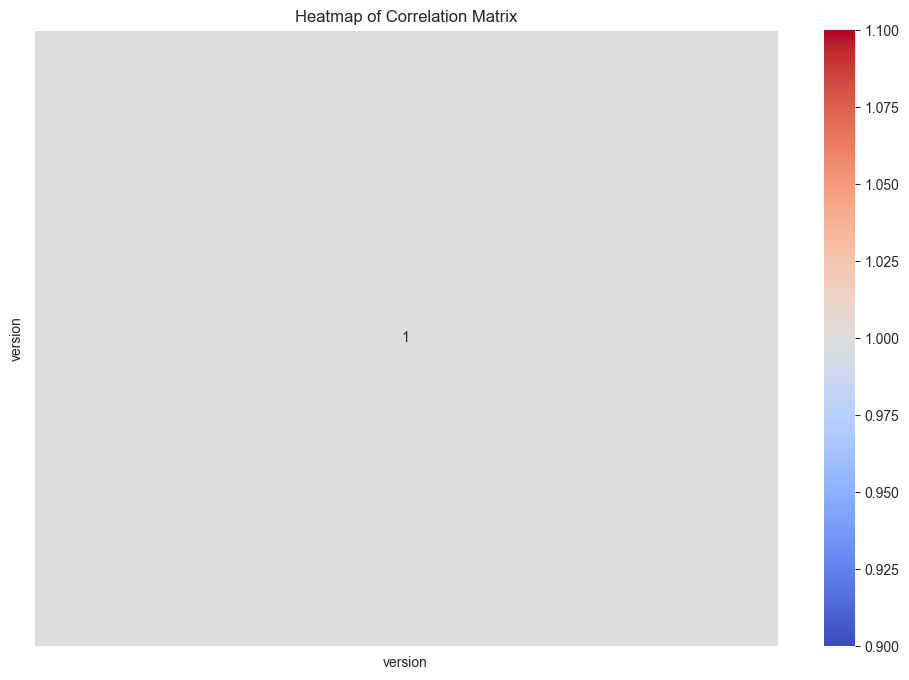

In [43]:

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
correlation_matrix = df[numerical_columns].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')


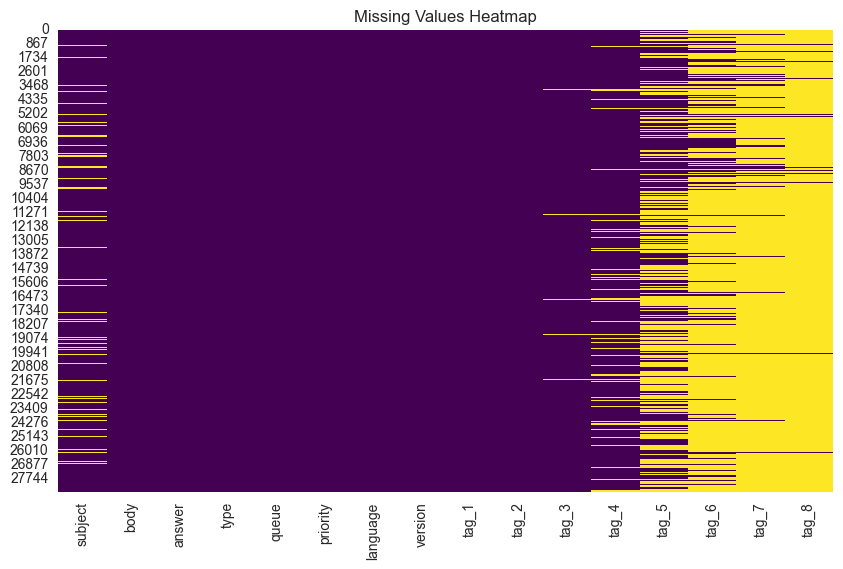

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

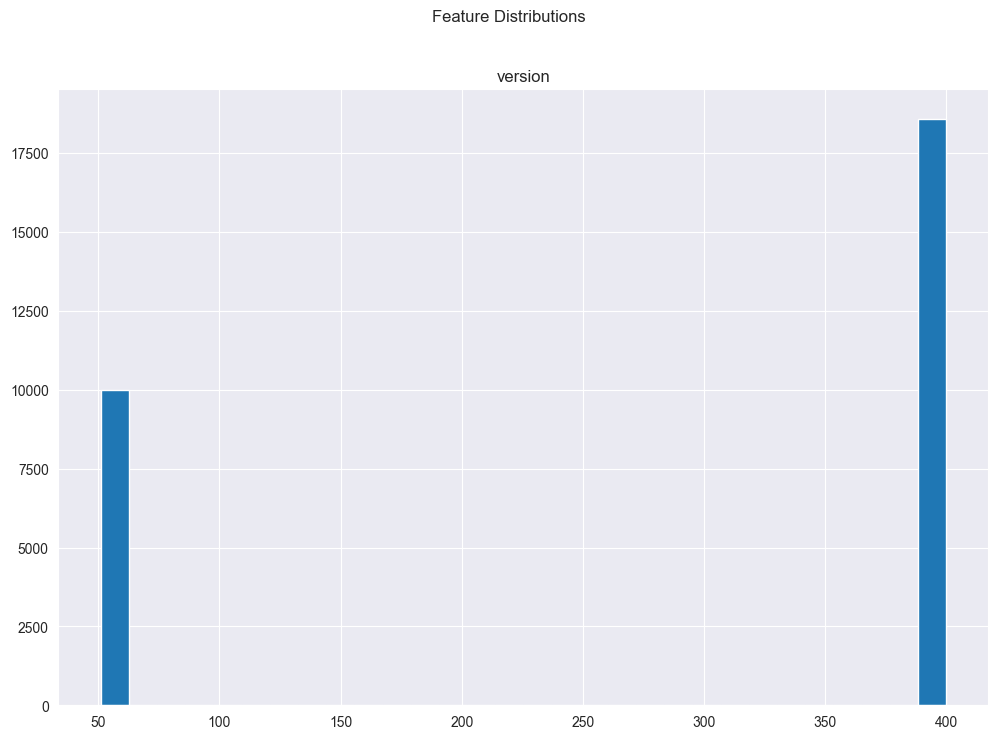

In [45]:
df.hist(figsize=(12,8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

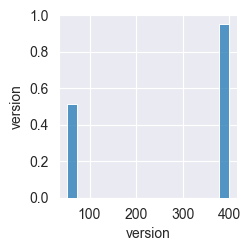

In [46]:
sns.pairplot(df)
plt.show()

In [47]:
print(df.shape)  
print(df.head())  

(28587, 16)
                                             subject  \
0                    Wesentlicher Sicherheitsvorfall   
1                                 Account Disruption   
2  Query About Smart Home System Integration Feat...   
3                  Inquiry Regarding Invoice Details   
4  Question About Marketing Agency Software Compa...   

                                                body  \
0  Sehr geehrtes Support-Team,\n\nich möchte eine...   
1  Dear Customer Support Team,\n\nI am writing to...   
2  Dear Customer Support Team,\n\nI hope this mes...   
3  Dear Customer Support Team,\n\nI hope this mes...   
4  Dear Support Team,\n\nI hope this message reac...   

                                              answer      type  \
0  Vielen Dank für die Meldung des kritischen Sic...  Incident   
1  Thank you for reaching out, <name>. We are awa...  Incident   
2  Thank you for your inquiry. Our products suppo...   Request   
3  We appreciate you reaching out with your billi.

In [48]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:\n")
    display(df[col].value_counts())



Value counts for subject:



subject
Wesentlicher Sicherheitsvorfall                                                            1
Detailed Integration of RapidMiner Data Analytics Tools                                    1
Healthcare Provider System Security Incident Identified                                    1
Unusual Decline in Brand Engagement Metrics Lately                                         1
Assistance with Support                                                                    1
                                                                                          ..
Detaillierte Anweisungen für die Integration des Rode NT-USB Mini in die SaaS-Plattform    1
Issues Identified in Hospital Data Security System                                         1
Issue with the SaaS Platform                                                               1
Security of Hospital IT Systems SAP ERP                                                    1
Inquiry About Project Management Features                     


Value counts for body:



body
Sehr geehrtes Support-Team,\n\nich möchte einen gravierenden Sicherheitsvorfall melden, der gegenwärtig mehrere Komponenten unserer Infrastruktur betrifft. Betroffene Geräte umfassen Projektoren, Bildschirme und Speicherlösungen auf Cloud-Plattformen. Der Grund für die Annahme ist, dass der Vorfall eine potenzielle Datenverletzung im Zusammenhang mit einer Cyberattacke darstellt, was ein erhebliches Risiko für sensible Informationen und den laufenden Geschäftsbetrieb unserer Organisation bedeutet.\n\nUnsere initialen Untersuchungen haben ungewöhnliche Aktivitäten und Abweichungen bei den Geräten ergeben. Trotz der Umsetzung unserer standardisierten Behebungs- und Eindämmungsmaßnahmen konnte die Bedrohung bislang nicht vollständig eliminiert.    1
Customer Support, facing persistent outages with digital tools, which are hindering our brand growth initiatives. It could be due to software incompatibility following recent updates. Despite attempting device reboots, checking network co


Value counts for answer:



answer
Vielen Dank für die Meldung des kritischen Sicherheitsvorfalls und die Bereitstellung der Übersicht über die betroffenen Geräte sowie der ergriffenen ersten Maßnahmen. Wir erkennen die Dringlichkeit und Schwere der Lage an und setzen alles daran, den Fall prioritär zu bearbeiten. Für eine umgehende Untersuchung benötigen wir zusätzliche Informationen: Bitte senden Sie uns spezifische Protokolle der betroffenen Projektoren, Bildschirme und Cloud-Speichersysteme, inklusive Zeitstempel verdächtiger Aktivitäten sowie ungewöhnlicher Fehlermeldungen. Falls möglich, fügen Sie auch eine Zusammenfassung der bereits durchgeführten Maßnahmen bei.                                    1
We have received an email regarding the sudden drop in website visitors. To assist, could you please provide more details on the current algorithm fluctuations and analytics settings? We will review this information and contact you at a convenient time to discuss the next steps in problem resolution.           


Value counts for type:



type
Incident    11466
Request      8187
Problem      6012
Change       2922
Name: count, dtype: int64


Value counts for queue:



queue
Technical Support                  8362
Product Support                    5252
Customer Service                   4268
IT Support                         3433
Billing and Payments               2788
Returns and Exchanges              1437
Service Outages and Maintenance    1148
Sales and Pre-Sales                 918
Human Resources                     576
General Inquiry                     405
Name: count, dtype: int64


Value counts for priority:



priority
medium    11515
high      11178
low        5894
Name: count, dtype: int64


Value counts for language:



language
en    16338
de    12249
Name: count, dtype: int64


Value counts for tag_1:



tag_1
Security                                                            5880
Bug                                                                 5337
Feedback                                                            3557
Feature                                                             3081
Performance                                                         3065
                                                                    ... 
UI                                                                     1
Performance,Outage,Disruption,Recovery,Marketing,Agentur,Analyse       1
Security,IT,Tech Support                                               1
User Interface                                                         1
Warranty                                                               1
Name: count, Length: 116, dtype: int64


Value counts for tag_2:



tag_2
Performance               5903
IT                        2697
Documentation             1970
Disruption                1850
Sales                     1516
                          ... 
Digital Transformation       1
Admin                        1
Business Information         1
Solution                     1
Technical                    1
Name: count, Length: 256, dtype: int64


Value counts for tag_3:



tag_3
IT                     6121
Tech Support           2635
Performance            2611
Disruption             1877
Documentation          1610
                       ... 
Cisco IOS                 1
Integration Problem       1
Utility                   1
Targeting                 1
Warranty                  1
Name: count, Length: 392, dtype: int64


Value counts for tag_4:



tag_4
Tech Support         6568
IT                   4809
Documentation        1303
Performance          1244
Disruption           1242
                     ... 
Promotional Offer       1
Campaign Analysis       1
System Slowness         1
Reputation              1
HR                      1
Name: count, Length: 554, dtype: int64


Value counts for tag_5:



tag_5
Tech Support           4617
IT                     1932
Recovery                668
Documentation           557
Feedback                481
                       ... 
System Optimization       1
Audience Mismatch         1
Advertising Budget        1
Downtime                  1
Replacement               1
Name: count, Length: 602, dtype: int64


Value counts for tag_6:



tag_6
Tech Support         1847
IT                    435
Support               132
Recovery              129
Documentation         120
                     ... 
Visuals                 1
Third-party             1
Security Practice       1
Guide                   1
HR                      1
Name: count, Length: 575, dtype: int64


Value counts for tag_7:



tag_7
Tech Support        391
Support              80
IT                   77
Integration          32
Troubleshooting      26
                   ... 
Problem-Solving       1
ThreatPrevention      1
Financial Data        1
Urgency               1
Employee              1
Name: count, Length: 427, dtype: int64


Value counts for tag_8:



tag_8
Tech Support               77
Support                    36
Assistance                 15
IT                         15
Guidance                   13
                           ..
Review                      1
Influencer Partnerships     1
Success Story               1
Dashboard                   1
Training                    1
Name: count, Length: 224, dtype: int64